In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("../data/bangkok_traffy.csv")

In [3]:
df = df.drop(['organization','comment','photo','photo_after','coords','address','star','count_reopen'],axis=1)

In [4]:
df.head()

,ticket_id,type,subdistrict,district,province,timestamp,state,last_activity
0,2021-9LHDM6,{},บางพลัด,บางพลัด,กรุงเทพมหานคร,2021-09-01 10:44:55.353209+00,กำลังดำเนินการ,2022-02-22 04:59:58.622268+00
1,2021-FYJTFP,{ความสะอาด},NaN,NaN,กรุงเทพมหานคร,2021-09-03 12:51:09.453003+00,เสร็จสิ้น,2022-06-04 15:34:14.609206+00
2,2021-8GKAR9,{สายไฟ},สามเสนนอก,ห้วยขวาง,จังหวัดกรุงเทพมหานคร,2021-09-19 06:47:50.488685+00,กำลังดำเนินการ,2022-02-22 04:30:07.293416+00
3,2021-AFPUXZ,"{ถนน,สะพาน}",สีลม,บางรัก,กรุงเทพมหานคร,2021-09-19 07:40:30.000781+00,กำลังดำเนินการ,2022-02-22 04:30:04.507406+00
4,2021-CGPMUN,"{น้ำท่วม,ร้องเรียน}",หนองบอน,ประเวศ,กรุงเทพมหานคร,2021-09-19 14:56:08.924992+00,เสร็จสิ้น,2022-06-21 08:21:09.532782+00


In [5]:
df.isna().sum()

ticket_id        2722
type               97
subdistrict        72
district           74
province           25
timestamp           0
state               0
last_activity       0
dtype: int64

In [6]:
df['province'].unique()

array(['กรุงเทพมหานคร', 'จังหวัดกรุงเทพมหานคร', 'นนทบุรี', 'นครปฐม',
       'ศรีสะเกษ', 'สมุทรปราการ', 'เชียงใหม่', 'ปทุมธานี', 'สมุทรสาคร',
       'อ่างทอง', 'ชลบุรี', 'ภูเก็ต', 'ยะลา', 'ลำปาง', 'พระนครศรีอยุธยา',
       'ตาก', 'อุบลราชธานี', 'ฉะเชิงเทรา', 'ขอนแก่น', 'นครศรีธรรมราช',
       'เชียงราย', nan, 'จันทบุรี', 'สงขลา', 'นครราชสีมา', 'ปราจีนบุรี',
       'กาฬสินธุ์', 'พิจิตร', 'อุตรดิตถ์', 'ราชบุรี', 'กาญจนบุรี',
       'ชัยนาท', 'อุทัยธานี', 'สุพรรณบุรี', 'ลพบุรี', 'นครสวรรค์',
       'นครนายก', 'สกลนคร', 'สตูล', 'อุดรธานี', 'เพชรบุรี', 'ตรัง',
       'สุรินทร์', 'อำนาจเจริญ', 'บุรีรัมย์', 'สุโขทัย', 'สุราษฎร์ธานี',
       'พิษณุโลก', 'มหาสารคาม', 'ร้อยเอ็ด', 'แพร่', 'สมุทรสงคราม',
       'สิงห์บุรี', 'ลำพูน', 'ระยอง', 'ยโสธร', 'นครพนม', 'น่าน',
       'หนองบัวลำภู', 'จังหวัดชลบุรี', 'จังหวัดจังหวัด กรุงเทพมหานคร',
       'จังหวัดพระนครศรีอยุธยา', 'จังหวัดสมุทรปราการ', 'จังหวัดLac',
       'จังหวัดฉะเชิงเทรา', 'จังหวัดนนทบุรี', 'จังหวัดBangkok',
       'จังหวัดจังหวัดกรุงเทพม

In [7]:
df = df[df['province'].str.contains('กรุงเทพ|bangkok',na=False,case=False)]

In [8]:
# df[df['type']=='{}'].time.value_counts()

In [9]:
df = df.dropna(subset=['subdistrict', 'district'] )

In [10]:
df.isna().sum()

ticket_id        2694
type               97
subdistrict         0
district            0
province            0
timestamp           0
state               0
last_activity       0
dtype: int64

In [11]:
df = df[df['state'].str.contains('เสร็จ',na=False,case=False)]

In [12]:
# df.type.unique()

array(['{น้ำท่วม,ร้องเรียน}', '{สะพาน}', '{น้ำท่วม,ถนน}', ...,
       '{ความสะอาด,เสียงรบกวน,ร้องเรียน,ถนน}',
       '{ความสะอาด,สะพาน,สัตว์จรจัด}',
       '{ความสะอาด,สอบถาม,ร้องเรียน,สัตว์จรจัด}'], dtype=object)

In [13]:
df.district.value_counts()

district
จตุจักร              10106
ประเวศ                8895
บางแค                 7915
บางเขน                6915
ลาดกระบัง             6638
บางกะปิ               6605
วัฒนา                 6418
คลองเตย               6111
สวนหลวง               5780
บางขุนเทียน           5158
บึงกุ่ม               4936
บางซื่อ               4729
ราชเทวี               4613
ปทุมวัน               4607
ดินแดง                4462
บางกอกน้อย            4384
ลาดพร้าว              4348
สาทร                  4326
บางรัก                4295
วังทองหลาง            4241
พญาไท                 4078
ธนบุรี                4012
บางนา                 3837
สายไหม                3831
พระนคร                3798
คลองสามวา             3751
มีนบุรี               3599
ห้วยขวาง              3501
บางพลัด               3451
ภาษีเจริญ             3434
สะพานสูง              3277
หนองจอก               3276
หลักสี่               3221
พระโขนง               3209
จอมทอง                3184
ดอนเมือง              3161
ตลิ่งชัน           

In [37]:
vc_subdistrict = df.subdistrict.value_counts()
df.subdistrict.value_counts()
dict(vc_subdistrict)

{'สวนหลวง': 5780,
 'ดินแดง': 4462,
 'ประเวศ': 4204,
 'สามเสนใน': 4078,
 'อนุสาวรีย์': 4007,
 'บางแคเหนือ': 3797,
 'แสมดำ': 3707,
 'หัวหมาก': 3569,
 'บางจาก': 3344,
 'จอมพล': 3201,
 'ลาดพร้าว': 3195,
 'คลองจั่น': 3036,
 'คลองตันเหนือ': 3001,
 'คลองเตย': 2945,
 'ท่าแร้ง': 2908,
 'ดอกไม้': 2648,
 'มีนบุรี': 2628,
 'สะพานสูง': 2625,
 'บางซื่อ': 2597,
 'บางนาเหนือ': 2429,
 'จตุจักร': 2386,
 'บางมด': 2292,
 'สีลม': 2246,
 'บางแค': 2230,
 'ทุ่งสองห้อง': 2166,
 'วงศ์สว่าง': 2132,
 'ลุมพินี': 2118,
 'ลาดยาว': 2049,
 'หนองบอน': 2043,
 'คลองเตยเหนือ': 2030,
 'พระโขนง': 2026,
 'พลับพลา': 1864,
 'ลาดกระบัง': 1848,
 'ทุ่งวัดดอน': 1823,
 'บางชัน': 1817,
 'ช่องนนทรี': 1789,
 'จันทรเกษม': 1681,
 'หนองค้างพลู': 1678,
 'นวลจันทร์': 1670,
 'คลองกุ่ม': 1653,
 'คลองสองต้นนุ่น': 1638,
 'นวมินทร์': 1613,
 'ดอนเมือง': 1569,
 'ทุ่งครุ': 1474,
 'ท่าข้าม': 1451,
 'สายไหม': 1441,
 'คลองถนน': 1438,
 'ทุ่งมหาเมฆ': 1410,
 'มักกะสัน': 1403,
 'บางนาใต้': 1401,
 'บางหว้า': 1394,
 'พระโขนงเหนือ': 1387,
 'วัดท่าพระ': 1335

In [15]:
df[['subdistrict','district']]

,subdistrict,district
4,หนองบอน,ประเวศ
10,ยานนาวา,สาทร
25,ลาดพร้าว,ลาดพร้าว
64,ลาดพร้าว,ลาดพร้าว
102,ดุสิต,ดุสิต
...,...,...
273790,พระโขนง,คลองเตย
273825,หนองค้างพลู,หนองแขม
273988,ยานนาวา,สาทร
274000,บางคอแหลม,บางคอแหลม


In [16]:
df['timestamp'] = pd.to_datetime(df['timestamp'], utc=True)
df['last_activity'] = pd.to_datetime(df['last_activity'], utc=True)

In [17]:
df['time'] =  (df['last_activity'] - df['timestamp']).dt.days

In [18]:
# Extract the month of the year
df['month'] = df['timestamp'].dt.month

# Extract the year
df['year'] = df['timestamp'].dt.year

# Extract the quarter of the year
df['quarter'] = df['timestamp'].dt.quarter

# Extract the day of the month
df['day'] = df['timestamp'].dt.day

In [19]:
df.time.describe()

count    204099.000000
mean         43.288644
std          70.048936
min           0.000000
25%           1.000000
50%           8.000000
75%          52.000000
max         515.000000
Name: time, dtype: float64

In [20]:
# df[df.time >=365//2]

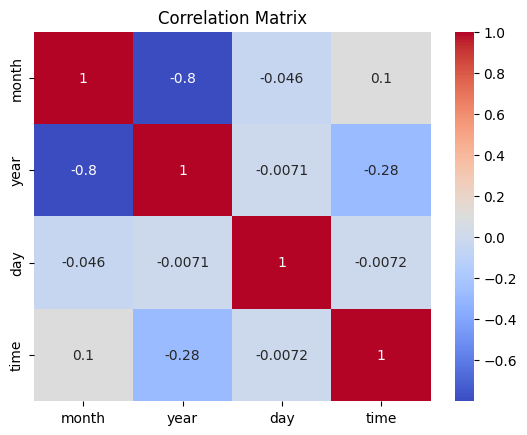

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = df[['month', 'year', 'day', 'time']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [22]:
type_con = df['type'].str.strip('{}').str.get_dummies(',')

In [43]:
df['type'].str.strip('{}').astype(str).apply(lambda x: x.split(",")).tolist()

[['น้ำท่วม', 'ร้องเรียน'],
 ['สะพาน'],
 ['น้ำท่วม', 'ถนน'],
 [''],
 [''],
 ['ความสะอาด'],
 [''],
 ['ท่อระบายน้ำ'],
 [''],
 ['ความสะอาด'],
 ['ถนน', 'ทางเท้า'],
 [''],
 [''],
 [''],
 ['ถนน', 'สะพาน'],
 [''],
 ['สะพาน'],
 ['จราจร', 'สะพาน', 'ถนน'],
 ['ถนน', 'ทางเท้า'],
 ['ทางเท้า'],
 ['ความสะอาด'],
 ['ทางเท้า'],
 [''],
 [''],
 [''],
 ['ถนน'],
 ['ความสะอาด'],
 [''],
 ['ถนน'],
 [''],
 ['ถนน'],
 [''],
 [''],
 ['แสงสว่าง'],
 [''],
 [''],
 [''],
 ['น้ำท่วม'],
 ['กีดขวาง'],
 ['เสียงรบกวน'],
 [''],
 ['กีดขวาง'],
 [''],
 ['ทางเท้า', 'สายไฟ'],
 [''],
 [''],
 [''],
 ['เสียงรบกวน'],
 ['ความสะอาด'],
 ['ทางเท้า'],
 ['ทางเท้า', 'สะพาน'],
 [''],
 [''],
 ['ทางเท้า', 'ความสะอาด'],
 [''],
 ['น้ำท่วม'],
 ['ความสะอาด'],
 [''],
 [''],
 ['ท่อระบายน้ำ'],
 [''],
 [''],
 [''],
 [''],
 [''],
 [''],
 [''],
 ['คลอง'],
 [''],
 [''],
 [''],
 [''],
 ['แสงสว่าง'],
 [''],
 [''],
 [''],
 [''],
 ['น้ำท่วม'],
 ['น้ำท่วม'],
 ['น้ำท่วม'],
 ['ความสะอาด'],
 ['น้ำท่วม'],
 ['น้ำท่วม'],
 ['น้ำท่วม'],
 [''],
 ['ความสะอาด'],
 ['สะพา

In [23]:
df = pd.concat([df,type_con],axis=1)

In [24]:
district_hot =  pd.get_dummies(df['district'])

In [25]:
df = pd.concat([df,district_hot],axis=1)

In [26]:
# df = df.drop(['ticket_id','type','subdistrict','district','province','timestamp','state','last_activity'],axis=1)

In [27]:
df[['time']].describe()

,time
count,204099.000000
mean,43.288644
std,70.048936
min,0.000000
25%,1.000000
50%,8.000000
75%,52.000000
max,515.000000


<Axes: xlabel='time', ylabel='Density'>

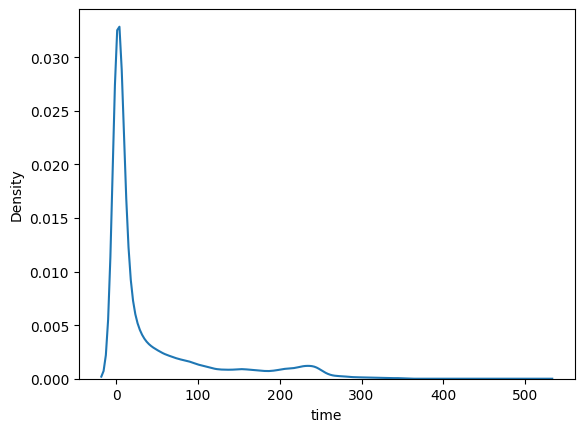

In [28]:
import seaborn as sns
sns.kdeplot(data=df, x="time")

In [29]:
# Q1 = df['time'].quantile(0.25)
# Q3 = df['time'].quantile(0.75)
# IQR = Q3 - Q1
# df = df.query('(@Q1 - 1.5 * @IQR) <= time <= (@Q3 + 1.5 * @IQR)')

In [30]:
df[['time']].describe()

,time
count,204099.000000
mean,43.288644
std,70.048936
min,0.000000
25%,1.000000
50%,8.000000
75%,52.000000
max,515.000000


<Axes: xlabel='time', ylabel='Density'>

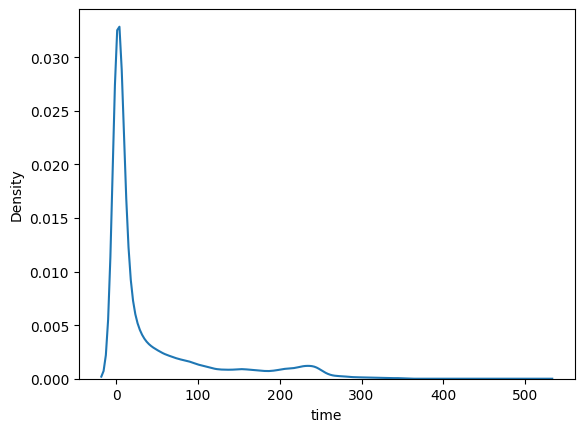

In [31]:
sns.kdeplot(data=df, x="time")

In [32]:
df.loc[df['time'].between(0, 0, 'both'), 'time_class'] = 'same day'
df.loc[df['time'].between(0, 1, 'right'), 'time_class'] = '1 day'
df.loc[df['time'].between(1, 3, 'right'), 'time_class'] = '3 days'
df.loc[df['time'].between(3, 7, 'right'), 'time_class'] = '1 week'
df.loc[df['time'].between(7, 15, 'right'), 'time_class'] = 'half month'
df.loc[df['time'].between(15, 30, 'right'), 'time_class'] = '1 month'
df.loc[df['time'].between(30, 60, 'right'), 'time_class'] = '2 month'
df.loc[df['time'].between(60, 90, 'right'), 'time_class'] = '3 month'
df.loc[df['time'].between(90, 120, 'right'), 'time_class'] = '4 month'
df.loc[df['time'].between(120, 500, 'right'), 'time_class'] = 'other'

In [33]:
df[['time_class']]

,time_class
4,other
10,other
25,other
64,other
102,NaN
...,...
273790,same day
273825,same day
273988,same day
274000,same day


In [34]:
df.time_class.value_counts()

time_class
same day      33984
other         27720
1 week        24357
3 days        22679
half month    20893
1 day         19927
2 month       17823
1 month       17634
3 month       11593
4 month        7488
Name: count, dtype: int64

<Axes: ylabel='time_class'>

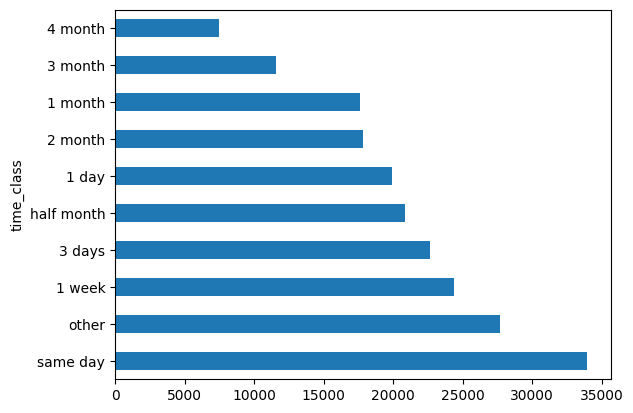

In [35]:
df['time_class'].value_counts().plot(kind='barh')


In [36]:
mapper = {
'same day':0,
'1 day':1,
'3 days':2,
'1 week':3,
'half month':4,
'1 month':5,
'2 month':6,
'3 month':7,
'4 month':8,
'other':9
}